<a href="https://colab.research.google.com/github/sujitpal/keras-tutorial-odsc2020/blob/master/01_01_nnbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Different kinds of Machine Learning Algorithms

At a very high level, there are three types of Machine Learning Algorithms.
* Supervised Learning -- here we are given a labeled training set composed of training features and labels, and our objective is to learn a function that can map the features on an unseen record to predict its label.
* Unsupervised Learning -- here we are given a large number of unlabeled records, our objective is to learn distinctive features of these records and/or their distribution so we can organize them, or generate new records having the same feature distribution.
* Reinforcement Learning -- the algorithm learns by making random moves and receiving feedback (reward or punishment) from an oracle. It incorporates the feedback into successive moves.

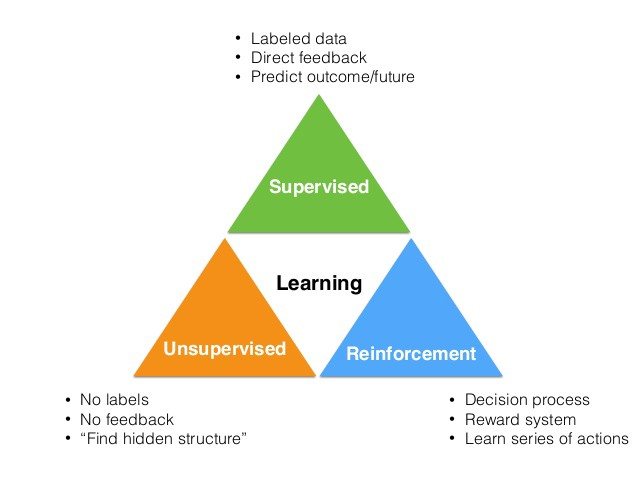

In this tutorial, we will mostly focus on supervised learning.

## Supervised Learning

In supervised learning, we are given a dataset and corresponding labels. For example, consider the following tasks:

* Image Classification -- we are given a set of photos of cats and dogs and their labels, "cat" and "dog". Our objective is to train a model that can take a photo of a cat or dog, and give a prediction "cat" or "dog".
* Sentiment Analysis -- we are given a set of movie reviews and a sentiment "positive" or "negative". Our objective is to train a model that can take a new movie review and predict its sentiment.

In both cases, we are given some input data (photo or movie review) with label that we will use to train our model. Once our model is trained, we will use it to predict the label for new photos or movie reviews.

Representing this idea as an equation:

$$y = f(X, \theta)$$

where:
* X -- an array of input records. Each input record is usually represented as a vector of features.
* y -- an array of labels, one for each input record.

During training, our objective is to find the parameters $\theta$ for the algorithm $f$ that satisfies the training set most closely.

Once our model is trained, we can use it to predict labels for new unseen records, i.e.,

$$y' = f(X', \theta)$$


## Supervised Learning Algorithms

A high level flowchart based on factors such as problem definition, data size, etc., can be found in the [Scikit-Learn Algorithm Cheat Sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Oddly, there is no mention of neural networks in this chart.

Neural Networks are a class of Machine Learning algorithms that are good for problems where:

* you have lots of data, either pre-labeled or where labeling can happen relatively cheaply.
* you have lots of compute capability.

Neural networks do lots of computations on a lot of data points, to detect patterns within the data. Prior to neural networks, these patterns or features would have to be painstakingly discovered by domain experts.


## Neural Networks

Neural networks can be thought of as universal function approximators. 

There are a relatively small number of core architectures that are adapted to various kinds of problems. For example,

* fully connected networks (FCN or Dense networks) are well suited for tabular data.
* convolutional neural networks (CNN) are well suited for computer vision problems.
* recurrent neural networks (RNN) are well suited for sequence data such as text, audio, or video.

A network's applicability for a particular task, such as image classification or sentiment analysis for example, is determined by its weight matrices. These weights are learned during the training phase.

## Logical building blocks: AND and OR

In this section, we will demonstrate how we can use different weights to make the same network behave like either an AND or an OR gate.

p1 | p2 | a = p1 AND p2
--- | --- | ---
0 | 0 | 0
0 | 1 | 0
1 | 0 | 0
1 | 1 | 1

p1 | p2 | a = p1 OR p2
--- | --- | ---
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 1

The architecture we will use is called a Perceptron. A schematic of the Perceptron is shown below.

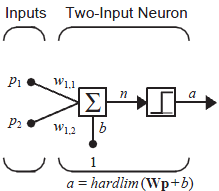

It takes two inputs $p_1$ and $p_2$ that is multiplied by weights $w_1$ and $w_2$, along with a bias term $b$. These signals are then summed. In matrix notation, assuming input vector p, weight matrix M, and bias vector b, 

$$a = \sigma(Wp + b)$$

where $\sigma$ is a non-linear function called the activation function. Here the activation function is the hardlim or heavyside function, and given by:

$$
heavyside(x) = \begin{cases}
0 & \text{ if } x < 0.5 \\ 
1 & \text{ otherwise }
\end{cases}
$$

In [ ]:
import numpy as np

W = np.random.random((2, 1))
b = np.random.random((1))

def model(p, W, b):
  return np.heaviside(np.matmul(p, W) + b, 0)

In [ ]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [ ]:
W = np.array([[1], [1]])
b = np.array([-0.5])
or_output = model(input, W, b)
print(or_output)

[[0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
W = np.array([[1], [1]])
b = np.array([-1.5])
and_output = model(input, W, b)
print(and_output)

[[0.]
 [0.]
 [0.]
 [1.]]


## Training via Backpropagation

We showed examples of the model behaving like an OR or an AND gate depending on the contents of its weight matrices W and b. Since most logic is achieved by these building blocks,

Given an arbitary problem defined by a set of inputs and corresponding outputs, we can also train a model to update its weights to fit the data, by a process called backpropagation.

We start with random weights W and b, then measure the error between the label and the output computed by the model. The error is given by some __loss function__ $L$. The gradient of the loss w.r.t the weights, scaled by a value $\alpha$ called the __learning rate__, is applied to the weights. The process continues until the error function is below some tolerance limit or until you have reached your pre-defined compute limit.

$$W \leftarrow W - \alpha \frac{\partial L}{\partial W}$$

We will now use Keras to train our logic gate network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs_t = tf.convert_to_tensor(input)
# labels_t = tf.convert_to_tensor([0, 0, 0, 1])
labels_t = tf.convert_to_tensor([0, 1, 1, 1])

model = keras.Sequential([
  layers.Dense(1, 
               input_shape=(2,),
               kernel_initializer="uniform", 
               name="layer_0")
])
model.compile(optimizer="SGD", loss="mse", metrics=["accuracy"])

# model.fit(inputs_t, labels_t, batch_size=4, epochs=100)
model.fit(inputs_t, labels_t, batch_size=4, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.2500
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.2500
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.2500
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.2500
Epoch 11/50
1/1 [======================

Note that the weights are different from the ones we had used originally for the AND and OR gates. The weights that we got via our training are one possible set of weights that satisfy the conditions.

Because we have not specified an activation function, it used relu, the default, which has slightly different behavior compared to the heaviside function we have seen or the sigmoid function that is usually used. We have to apply the heaviside function on the predictions to get our desired output for our logic gates.

In [ ]:
print("W:", model.layers[0].weights[0].numpy())
print("b:", model.layers[0].weights[1].numpy())

W: [[0.28639498]
 [0.29393977]]
b: [0.34185353]


In [ ]:
model.predict(inputs_t)

array([[0.34185353],
       [0.6357933 ],
       [0.6282485 ],
       [0.9221883 ]], dtype=float32)

In [ ]:
np.heaviside(model.predict(inputs_t) - 0.5, 0)

array([[0.],
       [1.],
       [1.],
       [1.]], dtype=float32)